In [21]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [22]:
#load data
(train_images, train_lables),(test_images, test_lables)= mnist.load_data()

In [23]:
#data preprocessing 
train_images = train_images.reshape((60000,784))
test_images = test_images.reshape((10000,784))

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)

In [24]:
#Network architecture
network = Sequential()
network.add(Dense(512, activation='relu', input_shape =(784,)))
network.add(Dense(10, activation='softmax'))

In [25]:
#optimization
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
#training
sequential_network = network.fit(train_images, train_lables, epochs=5, batch_size=128)

Epoch 1/5


2022-08-16 18:29:25.347861: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 6s 11ms/step - loss: 0.2579 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1035 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0682 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0380 - accuracy: 0.9884


In [39]:
#evaluation
network.evaluate(test_images, test_lables)

313/313 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9792


[0.06731809675693512, 0.979200005531311]

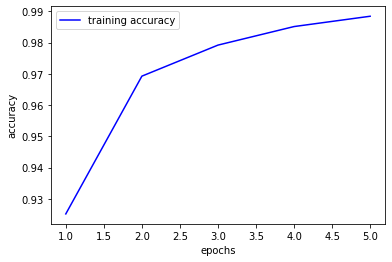

In [28]:
network_dict = sequential_network.history
loss_values = network_dict['loss']
accuracy_values = network_dict['accuracy']
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs,accuracy_values, 'b',label = 'training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
